# Classwork 3

# Importing the dataset

In [5]:
import pandas as pd
file = "un-general-debates"
df = pd.read_csv(r"C:\Users\ASUS\Downloads\un-general-debates-blueprint (1).csv")
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [6]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{"you'll", 'again', 'so', 'about', 'to', 'further', "hadn't", "mightn't", 'a', 'didn', "needn't", 'at', 'by', 'other', "shouldn't", 'this', "haven't", 'himself', 'over', 'once', 'when', 'very', 'm', 'only', 'few', 'ours', 'nor', 'is', 'such', 'from', 'don', 'whom', 'hers', 'any', 'against', 's', 'can', 'ain', "won't", 'after', 're', "couldn't", 'hadn', 'most', 'each', 'there', 'during', "that'll", 'will', "didn't", 'under', 'ma', 'just', 'through', 'mustn', 'or', 'o', 'its', 'yours', 've', 'am', 'own', 'what', "aren't", 'mightn', "don't", 'all', 'was', 'couldn', 'his', "you're", 'who', 'wouldn', 'their', 'having', 'but', 't', 'you', 'here', 'did', 'not', 'herself', 'been', 'have', 'haven', 'they', "mustn't", 'shan', 'where', 'an', 'themselves', 'she', "isn't", 'her', 'how', 'me', 'myself', 'because', 'does', 'the', 'then', 'my', 'too', 'below', 'i', 'off', 'd', 'theirs', 'yourselves', 'has', 'if', 'until', 'these', 'that', 'while', "you'd", "wouldn't", "you've", 'be', 'it', 'do', 'some

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Regex function 

In [14]:
import regex as re# initialisation of the regex function

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)


# Intialisation of the counter

In [16]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)# Takes only first 10 values of the dataframe and prints the frequency of the tokens


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Wordcloud

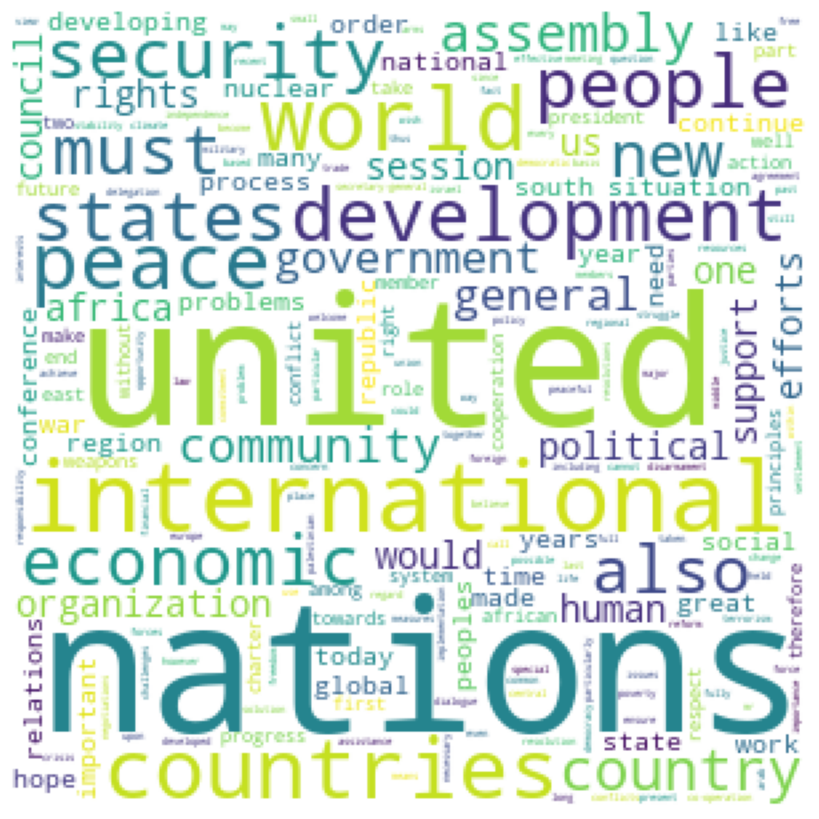

In [17]:
from wordcloud import WordCloud # intialisation of the wordcloud 
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show() # prints the wordcloud


# Doing TFIDF and comparing

In [28]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)


In [29]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf'] # TFIDF = TF* IDF 
freq_df.head() # compares them both for the starting values of the dataframe

,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


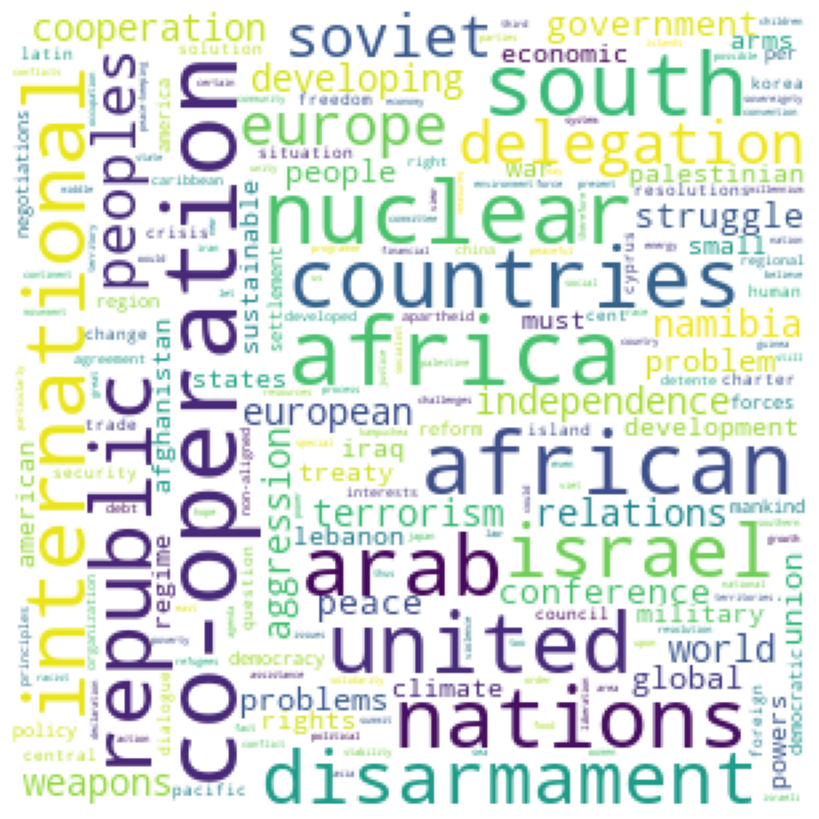

In [21]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show() # prints the wordcloud for the tfidf dataframe

# Genetraing heatmaps for the tokens

In [89]:
import pandas as pd
file = "un-general-debates"
df = pd.read_csv(r"C:\Users\ASUS\Downloads\un-general-debates-blueprint (1).csv")
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [90]:
import regex as re # Intialisation of the pipeline

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [91]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [44]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]



In [45]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


# Heat map for all the tokens in the dataframe

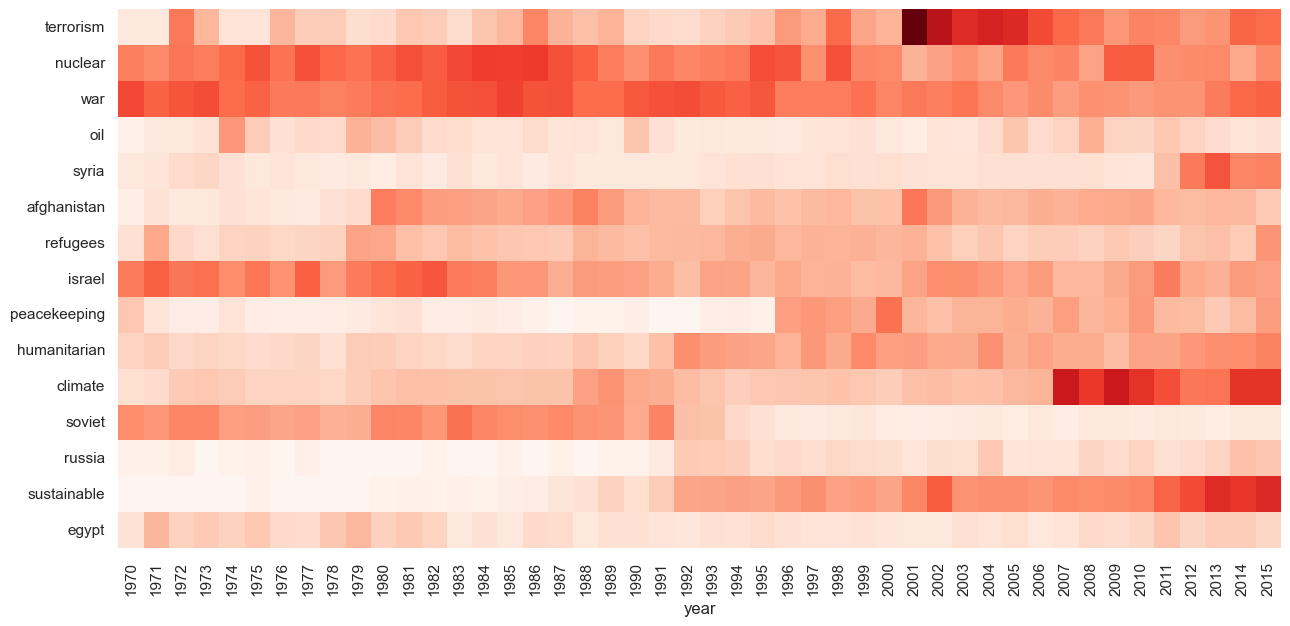

In [46]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


# Fequency Heatmaps for the selected countries from the dataframe

# selecting 4 random countries from the dataframe

In [99]:
import pandas as pd

# Provide the correct file path
file_path = r"C:\Users\ASUS\Downloads\un-general-debates-blueprint (1).csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# List of countries you want to filter for
countries_to_filter = ['SWZ', 'SYC','DOM','GIN']  # Add more countries as needed

# Filter the DataFrame for the specified countries
df = df[df['country'].isin(countries_to_filter)]
print(df)


      session  year country        country_name                     speaker  \
14         25  1970     DOM  Dominican Republic             Mr FERNANDEZ G.   
20         25  1970     GIN              Guinea                  Mr. CAMARA   
95         26  1971     DOM  Dominican Republic               Mr. FERNANDEZ   
107        26  1971     GIN              Guinea                  Mr. CAMARA   
217        27  1972     DOM  Dominican Republic           Mr. Gomez Berges    
...       ...   ...     ...                 ...                         ...   
7284       69  2014     SYC          Seychelles              Jean-Paul Adam   
7361       70  2015     DOM  Dominican Republic   Mr. Danilo Medina Sánchez   
7378       70  2015     GIN              Guinea  Mr. François Louncény Fall   
7477       70  2015     SWZ            Eswatini             King Mswati III   
7478       70  2015     SYC          Seychelles     Mrs. Dalia Grybauskaitė   

                          position  \
14           

In [100]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):# same process for the generation of the tokens, Intialisation of the pipeline 
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)


In [101]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token' # It only counts the tokens from the text of the selected 4 countries
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,2064
international,2050
united,1756
world,1639
countries,1575
peace,1396
development,1393
people,1174
republic,1021


# claculating TFIDF and comparing 

In [102]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [103]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,2064,206.400000
international,2050,205.000000
united,1756,175.600000
world,1639,163.900000
countries,1575,188.689138


In [104]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [105]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Generating the heatmap for the same stopwords but for the selected 4 random countries

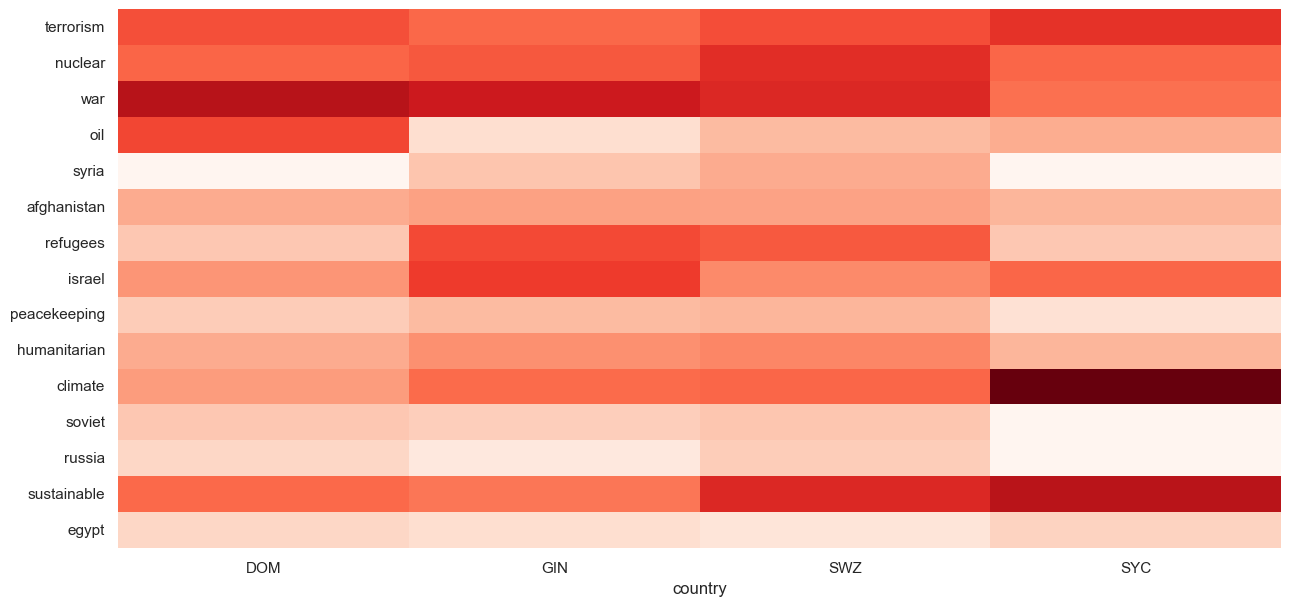

In [106]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='country', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('country')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)